In [1]:
from horton import *
import numpy as np
import matplotlib.pyplot as plt 
from optimiz import optimiz
Mu_NN=periodic['n'].mass/2.
def to_cm(k,Mu=Mu_NN):
    return (k/Mu)**0.5*centimeter/planck/lightspeed

def FivePointDerivatives(x,h):
   # '''a prediction of the minimum of a function based on a 4 point approx'''
    points =[]
    for i in range (5):
        points.append(toNN(x+h*(i-2),scf=b3lyp))
    fd4=(points[4]-points[3]*4+points[2]*6-points[1]*4+points[0])/h**4
    fd3=(points[4]-2*points[3]+2*points[1]-points[0])/(2*h**3)
    fd1=(points[3]-points[1]-h**3*fd3/3.)/2/h
    fd2=(points[3]-2*points[2]+points[1]-h**4/12.*fd4)/(h**2)
    
    print 'the derivatives are:', fd1,fd2,fd3, fd4, 'to cm:' ,to_cm(fd2)
    return (x,points[2],fd1,fd2,fd3,fd4)

def dx2f1(x,e,d1,d2,d3,d4):
    dx=-d1/d2
    p2d=d2+dx*d3
    return (x+dx,to_cm(p2d))

def dx2f2(x,e,d1,d2,d3,d4):
    dx=-d1/d2
    p2d=d2+dx*d3+dx**2*d4/2.
    return (x+dx,to_cm(p2d))

def dx3f1(x,e,d1,d2,d3,d4):
    delta=d2**2-2.*d1*d3
    if delta>0:
        dx=(-d2+(delta)**0.5)/d3
        p2d=d2+dx*d3
        return (x+dx,to_cm(p2d))
    else: return(1.,0.)
    
def dx3f2(x,e,d1,d2,d3,d4):
    delta=d2**2-2.*d1*d3
    if delta>0:
        dx=(-d2+(delta)**0.5)/d3
        p2d=d2+dx*d3+dx**2*d4/2.
        return (x+dx,to_cm(p2d))
    else: return(1.,0.)
    

def dx4f2(x,e,d1,d2,d3,d4):
    a=d4/6.
    b=d3/2.
    c=d2
    d=d1
    D0=b**2-3*a*c
    D1=2*b**3-9*a*b*c+27*a**2*d
    C=((D1+(D1**2-4*D0**3)**0.5)/2.)**(1/3.)
    dx=-(b+C+D0/C)/(3.*a)
    p2d=d2+dx*d3+0.5*d4*dx**2
    return x+dx, to_cm(p2d)

def dx4f2C(x,e,d1,d2,d3,d4):
    a=d4/6.
    b=d3/2.
    c=d2
    d=d1
    D0=b**2-3*a*c
    D1=2*b**3-9*a*b*c+27*a**2*d
    C=((D1+(D1**2-4*D0**3)**0.5)/2.)**(1/3.)
    dx=-(b+C+D0/C)/(3.*a)
    p2d=d2+dx*d3+0.5*d4*dx**2+d4**2/d3*dx**3/6. 
    return x+dx, to_cm(p2d)

In [2]:
import sys
sys.path.append('/home/giorgiod/Documents/horton_test/Alchemy CO-N2/Nitrogen')

In [3]:
from nn_scf import b3lyp,pbe,pbe0

In [9]:
a=optimiz(pbe,2.12,th=1e-12,dr0=.01)

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f181a4549a8>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f18541af610>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04403e+01                          1      -94.85

   0  1.04109e+01                          1      -94.8942045014479
   0  6.69422e+00                          2     -100.3552616329186
   0               1.000e+00    0.6413105  2 E                        -2.4860486
   1  1.79749e+00                          3     -109.0968497030111
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.90261e+00                          4     -109.1556685896167
   2               1.000e+00    0.5519426  4 E                        -0.1136658
   3  1.93329e-01                          5     -109.4433079185858
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.60799e-01                          6     -109.4439422548918
   4               1.000e+00    0.5816335  6 E                        -0.0006800
   5  1.28025e-02                          6     -109.4457377404748
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.13031e-02                     

   4  1.61290e-01                          6     -109.4442800704606
   4               1.000e+00    0.5815094  6 E                        -0.0006809
   5  1.28240e-02                          6     -109.4460771118207
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.13313e-02                          6     -109.4460808253069
   6               1.000e+00    0.5843032  6 E                        -0.0000038
   7  1.07694e-03                          6     -109.4460909176848
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  8.97657e-04                          6     -109.4460909383826
   8               1.331e+11    0.5809363  6 M                                  
   9  2.71496e-05                          6     -109.4460909952047
   9               1.029e+14    0.9958921  6 M                                  
  10  6.18975e-06                          6     -109.4460909952620
  10               2.973e+13    0.8900

   8  9.00835e-04                          6     -109.4463737404742
   8               1.326e+11    0.5812620  6 M                                  
   9  2.73595e-05                          6     -109.4463737973938
   9               1.014e+14    0.9959882  6 M                                  
  10  6.27868e-06                          6     -109.4463737974519
  10               4.539e+13    0.8983811  6 M                                  
  11  9.00961e-09                          6     -109.4463737974553
  11               2.846e+13    0.4184952  6 M                                  
  12  2.81598e-09                          6     -109.4463737974550
  12               9.112e+13    0.4917317  6 C                                  
  13  2.82620e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  12  3.14870e-09                          6     -109.4465985706309
  12               9.334e+13    0.3679311  6 C                                  
  13  2.92613e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.772587000929
                                           hartree       74.777167128841
                                        grid_group      -13.558381350083
                                                ne     -302.694889096769
                                                nn       23.256917746452
                                             total     -109.446598570630
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f18541eee50>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05427e+01                          1      -94.7257571925094
   0  6.76993e+00                          2     -100.2091294233011
   0               1.000e+00    0.6399461  2 E                        -2.5397548
   1  1.82063e+00                          3     -109.0927726982865
   1               0.000e+00    1.0000000  3 E                  

   0  1.05725e+01                          1      -94.6870672117570
   0  6.78716e+00                          2     -100.1748054295496
   0               1.000e+00    0.6396180  2 E                        -2.5523961
   1  1.82585e+00                          3     -109.0917172089033
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.94547e+00                          4     -109.1494795906678
   2               1.000e+00    0.5498824  4 E                        -0.1173060
   3  1.96786e-01                          5     -109.4444521788550
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.63358e-01                          6     -109.4450822301619
   4               1.000e+00    0.5809198  6 E                        -0.0006837
   5  1.29105e-02                          6     -109.4468830125241
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.14506e-02                     

   4  1.63799e-01                          6     -109.4450918138889
   4               1.000e+00    0.5807834  6 E                        -0.0006842
   5  1.29289e-02                          6     -109.4468929825112
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.14766e-02                          6     -109.4468966875146
   6               1.000e+00    0.5835219  6 E                        -0.0000038
   7  1.10084e-03                          6     -109.4469068609063
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  9.15745e-04                          6     -109.4469068815955
   8               1.303e+11    0.5826529  6 M                                  
   9  2.83481e-05                          6     -109.4469069390047
   9               9.432e+13    0.9963284  6 M                                  
  10  6.69879e-06                          6     -109.4469069390670
  10               4.351e+13    0.8985

   8  9.14785e-04                          6     -109.4469106762207
   8               1.305e+11    0.5825463  6 M                                  
   9  2.82854e-05                          6     -109.4469107336114
   9               9.493e+13    0.9963237  6 M                                  
  10  6.67111e-06                          6     -109.4469107336728
  10               4.522e+13    0.8989632  6 M                                  
  11  9.27015e-09                          6     -109.4469107336763
  11               1.402e+14    0.7987711  6 M                                  
  12  2.61351e-09                          6     -109.4469107336764
  12               1.009e+14    0.2655773  6 C                                  
  13  3.24361e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  12  3.15059e-09                          6     -109.4469104364366
  12               8.501e+13    0.4136012  6 C                                  
  13  3.01489e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.835636539763
                                           hartree       74.999428122926
                                        grid_group      -13.571313627570
                                                ne     -303.192628612299
                                                nn       23.481967140744
                                             total     -109.446910436436
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f18541af890>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05940e+01                          1      -94.6587877641421
   0  6.79947e+00                          2     -100.1509791289818
   0               1.000e+00    0.6394201  2 E                        -2.5609037
   1  1.82993e+00                          3     -109.0907909838312
   1               0.000e+00    1.0000000  3 E                  

   0  1.05930e+01                          1      -94.6602004131381
   0  6.79886e+00                          2     -100.1522249144428
   0               1.000e+00    0.6394317  2 E                        -2.5604475
   1  1.82974e+00                          3     -109.0908351633337
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.95123e+00                          4     -109.1484646831012
   2               1.000e+00    0.5496132  4 E                        -0.1178119
   3  1.97248e-01                          5     -109.4444651712943
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.63705e-01                          6     -109.4450948513398
   4               1.000e+00    0.5808318  6 E                        -0.0006844
   5  1.29276e-02                          6     -109.4468967464753
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.14723e-02                     

   4  1.63677e-01                          6     -109.4450951215059
   4               1.000e+00    0.5808352  6 E                        -0.0006843
   5  1.29257e-02                          6     -109.4468967780917
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.14703e-02                          6     -109.4469004860906
   6               1.000e+00    0.5835775  6 E                        -0.0000038
   7  1.09974e-03                          6     -109.4469106602390
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  9.14934e-04                          6     -109.4469106809442
   8               1.307e+11    0.5825319  6 M                                  
   9  2.82932e-05                          6     -109.4469107383590
   9               9.511e+13    0.9963436  6 M                                  
  10  6.67377e-06                          6     -109.4469107384203
  10               4.437e+13    0.8985

   8  9.14779e-04                          6     -109.4469106719197
   8               1.306e+11    0.5825335  6 M                                  
   9  2.82849e-05                          6     -109.4469107293189
   9               9.504e+13    0.9963310  6 M                                  
  10  6.67042e-06                          6     -109.4469107293802
  10               4.523e+13    0.8989067  6 M                                  
  11  9.27084e-09                          6     -109.4469107293836
  11               1.371e+14    0.7958053  6 M                                  
  12  2.63176e-09                          6     -109.4469107293836
  12               1.004e+14    0.2664861  6 C                                  
  13  3.23985e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  13  3.59218e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.837562525372
                                           hartree       75.006120777993
                                        grid_group      -13.571704491781
                                                ne     -303.207639279362
                                                nn       23.488749729420
                                             total     -109.446910738357
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f181a4549a8>
  Number of basis functions         : 60
  Number of norma

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f18541af450>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05922e+01                          1      -94.6612235429292
   0  6.79839e+00                          2     -100.1530286477999
   0               1.000e+00    0.6394370  2 E                        -2.5601738
   1  1.82959e+00                          3     -109.0908660459502
   1               0.000e+00    1.0000000  3 E                  

   0  1.05921e+01                          1      -94.6613805264408
   0  6.79833e+00                          2     -100.1531939109471
   0               1.000e+00    0.6394391  2 E                        -2.5601092
   1  1.82956e+00                          3     -109.0908726316093
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.95097e+00                          4     -109.1485093370575
   2               1.000e+00    0.5496260  4 E                        -0.1177893
   3  1.97233e-01                          5     -109.4444651251956
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.63694e-01                          6     -109.4450948524575
   4               1.000e+00    0.5808361  6 E                        -0.0006844
   5  1.29272e-02                          6     -109.4468967757984
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.14717e-02                     

   4  1.63658e-01                          6     -109.4450955456939
   4               1.000e+00    0.5808318  6 E                        -0.0006841
   5  1.29235e-02                          6     -109.4468967842897
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.14685e-02                          6     -109.4469004907812
   6               1.000e+00    0.5835740  6 E                        -0.0000038
   7  1.09948e-03                          6     -109.4469106612642
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  9.14715e-04                          6     -109.4469106819599
   8               1.305e+11    0.5825430  6 M                                  
   9  2.82818e-05                          6     -109.4469107393462
   9               9.493e+13    0.9963197  6 M                                  
  10  6.66947e-06                          6     -109.4469107394077
  10               4.302e+13    0.8982

   8  9.14906e-04                          6     -109.4469106819800
   8               1.307e+11    0.5825361  6 M                                  
   9  2.82927e-05                          6     -109.4469107393895
   9               9.507e+13    0.9963388  6 M                                  
  10  6.67353e-06                          6     -109.4469107394513
  10               4.588e+13    0.8990687  6 M                                  
  11  9.22284e-09                          6     -109.4469107394545
  11               6.725e+15    0.9527655  6 M                                  
  12  2.40347e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.837688545

  13  3.05893e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.837697679310
                                           hartree       75.006590219196
                                        grid_group      -13.571731911241
                                                ne     -303.208692218879
                                                nn       23.489225492170
                                             total     -109.446910739444
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f181a4549a8>
  Number of basis functions         : 60
  Number of norma

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f18541eef90>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05921e+01                          1      -94.6614043953068
   0  6.79841e+00                          2     -100.1528925862276
   0               1.000e+00    0.6394294  2 E                        -2.5602749
   1  1.82949e+00                          3     -109.0909113253627
   1               0.000e+00    1.0000000  3 E                  

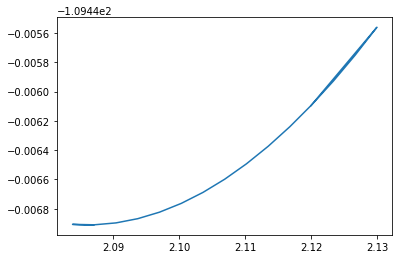

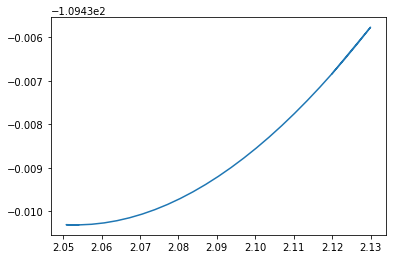

In [13]:
plt.plot([x[0] for x in opt_pbe],[x[1] for x in opt_pbe])
plt.show()
plt.plot([x[0] for x in opt_pbe0],[x[1] for x in opt_pbe0])

In [10]:
opt_pbe=a
opt_pbe0=optimiz(pbe0,2.12,th=1e-12,dr0=.01)

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f181a454a10>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f18542179d0>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04685e+01                          1      -94.79

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f18542179d0>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04392e+01                          1      -94.8309076290045
   0  6.87401e+00                          2     -100.4313670553755
   0               1.000e+00    0.6616427  2 E                        -1.9833013
   1  1.91820e+00                          3     -109.1296780533117
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.27064e+00    

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f1854217f50>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04681e+01                          1      -94.7946979292525
   0  6.89133e+00                          2     -100.3980708933070
   0               1.000e+00    0.6611780  2 E                        -1.9955236
   1  1.92159e+00                          3     -109.1299376686213
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.27434e+00                          4     -109.3250369544847
   2 

   0  1.04972e+01                          1      -94.7580307835830
   0  6.90878e+00                          2     -100.3647063805715
   0               1.000e+00    0.6607277  2 E                        -2.0076206
   1  1.92521e+00                          3     -109.1300901611129
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.27822e+00                          4     -109.3253635589951
   2               1.000e+00    0.8551607  4 E                        -0.0057671
   3  4.73531e-01                          5     -109.4222865354137
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.80345e-01                          6     -109.4321929540952
   4               1.000e+00    0.8538162  6 E                        -0.0002992
   5  9.93909e-02                          6     -109.4367946879755
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.80927e-02                     

   0  1.05265e+01                          1      -94.7208962322021
   0  6.92636e+00                          2     -100.3295081992789
   0               1.000e+00    0.6602230  2 E                        -2.0206381
   1  1.92850e+00                          3     -109.1302633804583
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.28195e+00                          4     -109.3256617264508
   2               1.000e+00    0.8546902  4 E                        -0.0058161
   3  4.74631e-01                          5     -109.4228532207060
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.81166e-01                          6     -109.4327576543037
   4               1.000e+00    0.8533029  6 E                        -0.0003016
   5  9.95451e-02                          6     -109.4373688190904
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.82164e-02                     

   1  1.93212e+00                          3     -109.1302929842837
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.28588e+00                          4     -109.3258638279205
   2               1.000e+00    0.8542026  4 E                        -0.0058684
   3  4.75783e-01                          5     -109.4233562411491
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.82024e-01                          6     -109.4332606607876
   4               1.000e+00    0.8527806  6 E                        -0.0003042
   5  9.97088e-02                          6     -109.4378823885212
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.83465e-02                          6     -109.4383166238284
   6               1.000e+00    0.8560803  6 E                        -0.0000126
   7  2.07856e-02                          6     -109.4385136287751
   7               0.000e+00    1.0000

   2  1.28996e+00                          4     -109.3259824716887
   2               1.000e+00    0.8537002  4 E                        -0.0059233
   3  4.76965e-01                          5     -109.4237958147921
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.82902e-01                          6     -109.4337010673506
   4               1.000e+00    0.8522498  6 E                        -0.0003069
   5  9.98763e-02                          6     -109.4383339621800
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.84795e-02                          6     -109.4387675099886
   6               1.000e+00    0.8555649  6 E                        -0.0000127
   7  2.08031e-02                          6     -109.4389646454431
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.21527e-02                          6     -109.4389834578661
   8               1.000e+00    0.8561

   1  1.94012e+00                          3     -109.1299725426871
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.29432e+00                          4     -109.3259937734218
   2               1.000e+00    0.8531721  4 E                        -0.0059828
   3  4.78204e-01                          5     -109.4241685695171
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.83819e-01                          6     -109.4340766875907
   4               1.000e+00    0.8517100  6 E                        -0.0003097
   5  1.00054e-01                          6     -109.4387219242699
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.86190e-02                          6     -109.4391548618666
   6               1.000e+00    0.8550410  6 E                        -0.0000128
   7  2.08222e-02                          6     -109.4393521702127
   7               0.000e+00    1.0000

   2  1.29852e+00                          4     -109.3259634844504
   2               1.000e+00    0.8526570  4 E                        -0.0060404
   3  4.79418e-01                          5     -109.4244778445894
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.84727e-01                          6     -109.4343876828969
   4               1.000e+00    0.8511620  6 E                        -0.0003126
   5  1.00225e-01                          6     -109.4390449245271
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.87555e-02                          6     -109.4394771890289
   6               1.000e+00    0.8545089  6 E                        -0.0000129
   7  2.08397e-02                          6     -109.4396746486613
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.21890e-02                          6     -109.4396933408865
   8               1.000e+00    0.8551

   3  4.80656e-01                          5     -109.4247195275380
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.85651e-01                          6     -109.4346315729221
   4               1.000e+00    0.8506056  6 E                        -0.0003155
   5  1.00398e-01                          6     -109.4393012620132
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.88940e-02                          6     -109.4397328626455
   6               1.000e+00    0.8539685  6 E                        -0.0000130
   7  2.08573e-02                          6     -109.4399304849063
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.22069e-02                          6     -109.4399491154351
   8               1.000e+00    0.8546062  6 E                        -0.0000006
   9  4.32913e-03                          6     -109.4399575985874
   9               4.050e+13    0.9771

   4  2.86594e-01                          6     -109.4348066169062
   4               1.000e+00    0.8500405  6 E                        -0.0003185
   5  1.00574e-01                          6     -109.4394893037890
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.90350e-02                          6     -109.4399202589191
   6               1.000e+00    0.8534198  6 E                        -0.0000131
   7  2.08750e-02                          6     -109.4401180594103
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.22251e-02                          6     -109.4401366286165
   8               1.000e+00    0.8540600  6 E                        -0.0000006
   9  4.32891e-03                          6     -109.4401451040494
   9               4.252e+13    0.9777855  6 M                                  
  10  2.08134e-03                          6     -109.4401460381639
  10               3.203e+14    0.9148

   5  1.00748e-01                          6     -109.4396074610774
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.91758e-02                          6     -109.4400377508111
   6               1.000e+00    0.8528628  6 E                        -0.0000132
   7  2.08921e-02                          6     -109.4402357275465
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.22430e-02                          6     -109.4402542341555
   8               1.000e+00    0.8535055  6 E                        -0.0000006
   9  4.32848e-03                          6     -109.4402627015188
   9               4.428e+13    0.9784029  6 M                                  
  10  2.09631e-03                          6     -109.4402636273161
  10               2.892e+14    0.9092474  6 M                                  
  11  1.13309e-04                          6     -109.4402639101640
  11               5.816e+15    0.9352

   6  5.93209e-02                          6     -109.4400836299470
   6               1.000e+00    0.8522975  6 E                        -0.0000133
   7  2.09100e-02                          6     -109.4402818094805
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.22616e-02                          6     -109.4403002548806
   8               1.000e+00    0.8529428  6 E                        -0.0000006
   9  4.32815e-03                          6     -109.4403087150422
   9               4.588e+13    0.9790115  6 M                                  
  10  2.11180e-03                          6     -109.4403096324593
  10               2.632e+14    0.9024094  6 M                                  
  11  1.12908e-04                          6     -109.4403099182802
  11               5.238e+15    0.9253182  6 M                                  
  12  2.32854e-06                          6     -109.4403099190995
  12               5.601e+15    0.8327

   7  2.09164e-02                          6     -109.4402809430650
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.22680e-02                          6     -109.4402993685402
   8               1.000e+00    0.8527525  6 E                        -0.0000006
   9  4.32809e-03                          6     -109.4403078266068
   9               4.639e+13    0.9792158  6 M                                  
  10  2.11715e-03                          6     -109.4403087412074
  10               2.553e+14    0.8998286  6 M                                  
  11  1.12772e-04                          6     -109.4403090280687
  11               5.295e+15    0.9234874  6 M                                  
  12  2.33016e-06                          6     -109.4403090288848
  12               2.130e+16    0.9463852  6 M                                  
  13  5.98723e-09                          6     -109.4403090288848
  13               1.929e+16    0.3845

   6  5.93229e-02                          6     -109.4400836668916
   6               1.000e+00    0.8522946  6 E                        -0.0000133
   7  2.09106e-02                          6     -109.4402818559801
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.22620e-02                          6     -109.4403003018643
   8               1.000e+00    0.8529400  6 E                        -0.0000006
   9  4.32824e-03                          6     -109.4403087623535
   9               4.590e+13    0.9790135  6 M                                  
  10  2.11201e-03                          6     -109.4403096797441
  10               2.623e+14    0.9021842  6 M                                  
  11  1.12909e-04                          6     -109.4403099656160
  11               5.278e+15    0.9251403  6 M                                  
  12  2.32872e-06                          6     -109.4403099664350
  12               7.806e+15    0.8718

   7  2.09120e-02                          6     -109.4402824415347
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.22637e-02                          6     -109.4403008797725
   8               1.000e+00    0.8528782  6 E                        -0.0000006
   9  4.32809e-03                          6     -109.4403093390403
   9               4.604e+13    0.9790824  6 M                                  
  10  2.11355e-03                          6     -109.4403102554933
  10               2.610e+14    0.9016732  6 M                                  
  11  1.12861e-04                          6     -109.4403105416493
  11               5.365e+15    0.9249136  6 M                                  
  12  2.32901e-06                          6     -109.4403105424674
  12               2.140e+16    0.9471083  6 M                                  
  13  5.98065e-09                          6     -109.4403105424675
  13               1.958e+16    0.3849

   8  1.22643e-02                          6     -109.4403008785561
   8               1.000e+00    0.8528575  6 E                        -0.0000006
   9  4.32805e-03                          6     -109.4403093374675
   9               4.609e+13    0.9791056  6 M                                  
  10  2.11409e-03                          6     -109.4403102536086
  10               2.604e+14    0.9014427  6 M                                  
  11  1.12845e-04                          6     -109.4403105398646
  11               5.389e+15    0.9248988  6 M                                  
  12  2.32914e-06                          6     -109.4403105406824
  12               5.039e+16    0.9746071  6 M                                  
  13  5.97466e-09                          6     -109.4403105406831
  13               2.894e+16    0.5754827  6 M                                  
  14  7.28174e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

   9  4.32815e-03                          6     -109.4403093396983
   9               4.606e+13    0.9790789  6 M                                  
  10  2.11365e-03                          6     -109.4403102561584
  10               2.600e+14    0.9015027  6 M                                  
  11  1.12863e-04                          6     -109.4403105423417
  11               5.364e+15    0.9246332  6 M                                  
  12  2.32913e-06                          6     -109.4403105431597
  12               3.175e+16    0.9626146  6 M                                  
  13  5.97732e-09                          6     -109.4403105431604
  13               2.048e+16    0.4171766  6 M                                  
  14  5.31149e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  10  2.11389e-03                          6     -109.4403102657872
  10               2.597e+14    0.9014012  6 M                                  
  11  1.12859e-04                          6     -109.4403105520196
  11               5.295e+15    0.9242984  6 M                                  
  12  2.32924e-06                          6     -109.4403105528376
  12               1.103e+16    0.9047582  6 M                                  
  13  5.99084e-09                          6     -109.4403105528379
  13               1.851e+16    0.3770690  6 M                                  
  14  3.23533e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.910597533

  11  1.12854e-04                          6     -109.4403105513599
  11               5.286e+15    0.9242887  6 M                                  
  12  2.32928e-06                          6     -109.4403105521779
  12               1.131e+16    0.9070275  6 M                                  
  13  5.99069e-09                          6     -109.4403105521781
  13               1.858e+16    0.3765516  6 M                                  
  14  3.26393e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.910875955568
                                           hartree       75.303295243810
                                        grid_group       -9.211591632033

  12  2.32905e-06                          6     -109.4403105535386
  12               4.785e+16    0.9733708  6 M                                  
  13  5.97442e-09                          6     -109.4403105535390
  13               2.584e+16    0.5398944  6 M                                  
  14  7.10096e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.910784071134
                                           hartree       75.302995723525
                                        grid_group       -9.211579420243
                                              x_hf       -4.374971299685
                                                ne     -303.932563486332
  

  13  5.97828e-09                          6     -109.4403105537734
  13               2.034e+16    0.4161891  6 M                                  
  14  5.28705e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.910692191807
                                           hartree       75.302696209932
                                        grid_group       -9.211567208824
                                              x_hf       -4.374964251631
                                                ne     -303.931891135735
                                                nn       23.864723640677
                                             total     -109.440310553774
~~~~~

  14  5.78652e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.910722511420
                                           hartree       75.302795048681
                                        grid_group       -9.211571238551
                                              x_hf       -4.374966577470
                                                ne     -303.932113009480
                                                nn       23.864822711579
                                             total     -109.440310553821
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f18541eebd0>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.07703e+01                          1      -94.4015424182670
   0  7.07179e+00                          2     -100.0408518999682
   0               1.000e+00    0.6566014  2 E                        -2.1232302
   1  1.96203e+00                          3     -109.1275615021404
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f18541ee910>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.07703e+01                          1      -94.4015605834427
   0  7.07183e+00                          2     -100.0406621144139
   0               1.000e+00    0.6565948  2 E                        -2.1233233
   1  1.96199e+00                          3     -109.1275804006523
   1               0.000e+00    1.0000000  3 E                  

In [14]:
k_pbe=(pbe(2.086067040511045-1.e-2)+2*109.44691073945472+pbe(2.086067040511045+1.e-2))*1.e+4
k_pbe0=(pbe0(2.053232623548344-1.e-2)+2*109.44031055382123+pbe0(2.053232623548344+1.e-2))*1.e+4

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f181a454c80>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f1854217c50>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.06376e+01                          1      -94.60

   0  1.08168e+01                          1      -94.3385426853010
   0  7.09950e+00                          2      -99.9848720041180
   0               1.000e+00    0.6559603  2 E                        -2.1425897
   1  1.96920e+00                          3     -109.1263226684899
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.32476e+00                          4     -109.3241486035657
   2               1.000e+00    0.8494698  4 E                        -0.0064134
   3  4.86676e-01                          5     -109.4249073764611
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.90159e-01                          6     -109.4348364016843
   4               1.000e+00    0.8479085  6 E                        -0.0003301
   5  1.01228e-01                          6     -109.4395700069789
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.95630e-02                     

In [15]:
print 'freq pbe = ', to_cm(k_pbe)
print 'freq pbe0 = ', to_cm(k_pbe0)

freq pbe =  2359.59272586569
freq pbe0 =  2523.497090149433
